In [41]:
import pandas as pd
import numpy as np
df = pd.read_csv("CRM_data.csv")
df

,Subscribe date,Stagename,Project type,Property kind,Source of lead,Amount,Lost reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,primary_residence,old,partner1,118,NaN,NaN,1.0,NaN
1,2019-02-26,Perdu,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN
2,2019-01-09,Perdu,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaN,NaN,NaN
3,2019-03-22,Perdu,primary_residence,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN
4,2019-03-03,Gagné,rental_investment,old,partner1,142,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaN,NaN,NaN
3602,2019-01-03,Gagné,primary_residence,old,NaN,59,NaN,NaN,1.0,NaN
3603,2019-03-06,Perdu,rental_investment,old,NaN,242,Projet en recherche / Projet lointain,2019-03-15,NaN,NaN
3604,2019-02-14,Perdu,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN


In [42]:
# 1.
# Subscribe DATE: Date de modification d'abonnement au format %Y-%m-%d
# Stage Name: Statut Gain ou Perte du Lead
# Project Type: Des strings 
# Property Kind: ancienneté d'une propriété en String
# Source of Lead: String
# Amount: Int
# Lost reason: Si Lead Perdu, Pourquoi ? String
# Lost date: Si perdu à quelle date ? Format Date %Y-%m-%d
# Won: Quantité gagné en Float
#Cout du Lead:

In [43]:
#2.
df.drop_duplicates(inplace=True)
df.isnull().sum() / df.shape[0] * 100

Subscribe date     0.000000
Stagename          0.000000
Project type       0.166620
Property kind     48.708692
Source of lead    56.650930
Amount             0.000000
Lost reason       11.135796
Lost date         48.875312
Won               89.780616
Cout du lead      76.867537
dtype: float64

In [44]:
#3.
df.nunique()

Subscribe date     88
Stagename           2
Project type        3
Property kind       5
Source of lead     10
Amount            207
Lost reason        12
Lost date         157
Won                 1
Cout du lead       27
dtype: int64

In [45]:
# 4. 
df.apply(lambda col: col.dropna().unique())

Subscribe date    [2019-02-25, 2019-02-26, 2019-01-09, 2019-03-2...
Stagename                                            [Gagné, Perdu]
Project type      [primary_residence, rental_investment, seconda...
Property kind     [old, new, VEFA, land_construction, construction]
Source of lead    [partner1, partner10, partner2, partner3, part...
Amount            [118, 184, 243, 215, 142, 246, 77, 162, 60, 10...
Lost reason       [N'a jamais répondu (+5 appels), Projet en rec...
Lost date         [2019-03-13, 2019-03-28, 2019-05-06, 2019-04-2...
Won                                                           [1.0]
Cout du lead      [10.0, 33.0, 25.0, 28.0, 32.0, 34.0, 27.0, 30....
dtype: object

In [46]:
df["Subscribe date"] = pd.to_datetime(df["Subscribe date"])
df["Lost date"] = pd.to_datetime(df["Lost date"])
df.dtypes

Subscribe date    datetime64[ns]
Stagename                 object
Project type              object
Property kind             object
Source of lead            object
Amount                     int64
Lost reason               object
Lost date         datetime64[ns]
Won                      float64
Cout du lead             float64
dtype: object

In [47]:
df["Stagename_bin"] = df["Stagename"].replace("Gagné", 1).replace("Perdu", 0)
df

,Subscribe date,Stagename,Project type,Property kind,Source of lead,Amount,Lost reason,Lost date,Won,Cout du lead,Stagename_bin
0,2019-02-25,Gagné,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN,1
1,2019-02-26,Perdu,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN,0
2,2019-01-09,Perdu,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN,0
3,2019-03-22,Perdu,primary_residence,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN,0
4,2019-03-03,Gagné,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN,0
3602,2019-01-03,Gagné,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN,1
3603,2019-03-06,Perdu,rental_investment,old,NaN,242,Projet en recherche / Projet lointain,2019-03-15,NaN,NaN,0
3604,2019-02-14,Perdu,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN,0


In [48]:
df["Stagename_Dummies_win"] = (~pd.get_dummies(df["Stagename"], drop_first=True, dtype=bool)).convert_dtypes(convert_boolean=False)
df.dtypes
df["Stagename_Dummies_lose"] = (pd.get_dummies(df["Stagename"], drop_first=True, dtype=bool)).convert_dtypes(convert_boolean=False)
df.dtypes


Subscribe date            datetime64[ns]
Stagename                         object
Project type                      object
Property kind                     object
Source of lead                    object
Amount                             int64
Lost reason                       object
Lost date                 datetime64[ns]
Won                              float64
Cout du lead                     float64
Stagename_bin                      int64
Stagename_Dummies_win              Int64
Stagename_Dummies_lose             Int64
dtype: object

In [49]:
(df["Stagename"].values == "Gagné").sum()
df["Stagename_bin"].sum()

368

In [50]:
pd.get_dummies(df, columns=["Project type"], prefix= "", prefix_sep="")

,Subscribe date,Stagename,Property kind,Source of lead,Amount,Lost reason,Lost date,Won,Cout du lead,Stagename_bin,Stagename_Dummies_win,Stagename_Dummies_lose,primary_residence,rental_investment,secondary_residence
0,2019-02-25,Gagné,old,partner1,118,NaN,NaT,1.0,NaN,1,1,0,1,0,0
1,2019-02-26,Perdu,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN,0,0,1,1,0,0
2,2019-01-09,Perdu,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN,0,0,1,1,0,0
3,2019-03-22,Perdu,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN,0,0,1,1,0,0
4,2019-03-03,Gagné,old,partner1,142,NaN,NaT,1.0,NaN,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN,0,0,1,0,1,0
3602,2019-01-03,Gagné,old,NaN,59,NaN,NaT,1.0,NaN,1,1,0,1,0,0
3603,2019-03-06,Perdu,old,NaN,242,Projet en recherche / Projet lointain,2019-03-15,NaN,NaN,0,0,1,0,1,0
3604,2019-02-14,Perdu,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN,0,0,1,1,0,0


In [51]:
df = df.rename(columns={"Source of lead": "Source_of_lead", "Lost reason": "Lost_reason"})

In [52]:
df.groupby("Source_of_lead")[["Amount"]].sum()

,Amount
Source_of_lead,
partner1,13996
partner10,4153
partner2,34871
partner3,7301
partner4,65485
partner5,3940
partner6,23800
partner7,690
partner8,1935


In [53]:
df["total"] = df["Stagename_Dummies_win"] + df["Stagename_Dummies_lose"]
df["total"].sum()
df.drop("total", axis=1)

,Subscribe date,Stagename,Project type,Property kind,Source_of_lead,Amount,Lost_reason,Lost date,Won,Cout du lead,Stagename_bin,Stagename_Dummies_win,Stagename_Dummies_lose
0,2019-02-25,Gagné,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN,1,1,0
1,2019-02-26,Perdu,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN,0,0,1
2,2019-01-09,Perdu,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN,0,0,1
3,2019-03-22,Perdu,primary_residence,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN,0,0,1
4,2019-03-03,Gagné,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN,0,0,1
3602,2019-01-03,Gagné,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN,1,1,0
3603,2019-03-06,Perdu,rental_investment,old,NaN,242,Projet en recherche / Projet lointain,2019-03-15,NaN,NaN,0,0,1
3604,2019-02-14,Perdu,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN,0,0,1


In [54]:
df["Lost_reason"] = df["Lost_reason"].apply(lambda x: x.replace("/", "-") if type(x) == type("") else x)
df

,Subscribe date,Stagename,Project type,Property kind,Source_of_lead,Amount,Lost_reason,Lost date,Won,Cout du lead,Stagename_bin,Stagename_Dummies_win,Stagename_Dummies_lose,total
0,2019-02-25,Gagné,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN,1,1,0,1
1,2019-02-26,Perdu,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN,0,0,1,1
2,2019-01-09,Perdu,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN,0,0,1,1
3,2019-03-22,Perdu,primary_residence,new,partner1,215,Projet en recherche - Projet lointain,2019-03-28,NaN,NaN,0,0,1,1
4,2019-03-03,Gagné,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN,0,0,1,1
3602,2019-01-03,Gagné,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN,1,1,0,1
3603,2019-03-06,Perdu,rental_investment,old,NaN,242,Projet en recherche - Projet lointain,2019-03-15,NaN,NaN,0,0,1,1
3604,2019-02-14,Perdu,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN,0,0,1,1


In [55]:
df["Property kind"].replace(np.NaN, "Other")

0         old
1         new
2       Other
3         new
4         old
        ...  
3601    Other
3602      old
3603      old
3604      old
3605    Other
Name: Property kind, Length: 3601, dtype: object

In [56]:
# Quel est le montant moyen des inscriptions par mois ?

tdf = df[['Subscribe date', 'Amount']].copy()
tdf['Subscribe date'] = tdf['Subscribe date'].dt.strftime('%Y-%m')
tdf.groupby(by='Subscribe date')['Amount'].mean().to_frame()

,Amount
Subscribe date,
2019-01,156.792909
2019-02,153.803398
2019-03,157.293594


In [57]:
# Calculer l'évolution du taux de conversion par jour. On s'attend à avoir un groupement par mois et par jour et un taux de conversion

tdf = pd.DataFrame()
tdf['month'] = df['Subscribe date'].dt.month
tdf['day'] = df['Subscribe date'].dt.day
tdf['Stagename_bin'] = df['Stagename_bin']
tdf = tdf.sort_values(['month', 'day'])
tdf = tdf.groupby(['month', 'day'])['Stagename_bin'].mean().to_frame()
tdf['Stagename_bin'] = tdf['Stagename_bin']*100
tdf

Stagename_bin
month day               
1     1         5.000000
      2         9.433962
      3         5.660377
      4         6.382979
      5         8.000000
...                  ...
3     25       13.333333
      26       10.810811
      27       15.625000
      28        7.500000
      29       15.151515

[88 rows x 1 columns]

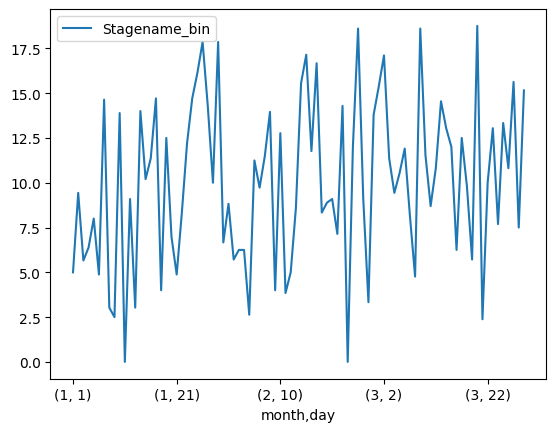

In [58]:

# Tracer la courbe du taux de conversion en fonction du temps

tdf.plot();

In [59]:
# Quelles sont les principales raisons de pertes des dossiers (Colonne: "Lost Reason"). A vous de définir comment faire... (Il y a plusieurs façons d'y parvenir)

tdf = df['Lost_reason'].to_frame()
tdf = tdf.groupby('Lost_reason')['Lost_reason'].count().sort_values(ascending=False)
tdf = tdf.to_frame().rename(columns={'Lost_reason' : 'Amount'})
tdf.head(5)

,Amount
Lost_reason,
N'a jamais répondu (+5 appels),616
Perdu contre autre banque,507
A répondu mais ne répond plus (+5 appels),396
Projet en recherche - Projet lointain,393
Dossier non finançable,370


In [60]:
df

,Subscribe date,Stagename,Project type,Property kind,Source_of_lead,Amount,Lost_reason,Lost date,Won,Cout du lead,Stagename_bin,Stagename_Dummies_win,Stagename_Dummies_lose,total
0,2019-02-25,Gagné,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN,1,1,0,1
1,2019-02-26,Perdu,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN,0,0,1,1
2,2019-01-09,Perdu,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN,0,0,1,1
3,2019-03-22,Perdu,primary_residence,new,partner1,215,Projet en recherche - Projet lointain,2019-03-28,NaN,NaN,0,0,1,1
4,2019-03-03,Gagné,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN,0,0,1,1
3602,2019-01-03,Gagné,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN,1,1,0,1
3603,2019-03-06,Perdu,rental_investment,old,NaN,242,Projet en recherche - Projet lointain,2019-03-15,NaN,NaN,0,0,1,1
3604,2019-02-14,Perdu,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN,0,0,1,1


In [61]:
# Le directeur marketing souhaite retravailler la répartition de son budget par canal. Quelles recommandations feriez-vous sur les canaux à prioriser

df['Gain'] = df['Amount']*df['Stagename_Dummies_win']-df['Cout du lead'].apply(lambda x: x if x > 0 else 0)
df2 = df.groupby('Source_of_lead')['Source_of_lead'].count().to_frame().rename(columns={'Source_of_lead' : 'number_of_leads'})
df2['won_leads'] = df.groupby('Source_of_lead')['Stagename_Dummies_win'].sum()
df2['total_gain'] =  df.groupby('Source_of_lead')['Gain'].sum()
df2['winrate'] = df2['won_leads']/df2['number_of_leads']
df2['average_gain'] = df.groupby('Source_of_lead')['Gain'].mean()
df2['sort'] = df2['winrate']*df2['average_gain']
df2.sort_values(by=['sort'], ascending=False, inplace=True)
df2

,number_of_leads,won_leads,total_gain,winrate,average_gain,sort
Source_of_lead,,,,,,
partner10,18,6,1173.0,0.333333,65.166667,21.722222
partner2,234,36,5245.0,0.153846,22.41453,3.448389
partner7,5,1,85.0,0.2,17.0,3.4
partner9,552,65,7885.0,0.117754,14.28442,1.682042
partner6,154,26,1330.0,0.168831,8.636364,1.458087
partner4,426,58,3059.0,0.13615,7.180751,0.977661
partner3,45,2,355.0,0.044444,7.888889,0.350617
partner1,90,4,634.0,0.044444,7.044444,0.313086
partner5,24,1,-176.0,0.041667,-7.333333,-0.305556


In [62]:
df2.index.values.tolist() # Ordre de priorité

['partner10',
 'partner2',
 'partner7',
 'partner9',
 'partner6',
 'partner4',
 'partner3',
 'partner1',
 'partner5',
 'partner8']

In [63]:
# Au vu des questions posées dans la rubrique question, aurait-il été intéressant de supprimer les lignes pour lesquelles 'Cout du lead' = np.nan ?

cdl = df['Cout du lead'].isna().value_counts()
print(f"'Cout du lead' contient {cdl[True]} NaN, supprimer ces lignes correspondrait à supprimer {round(cdl[True]/(cdl[False]+cdl[True])*100)}% du dataset")

'Cout du lead' contient 2768 NaN, supprimer ces lignes correspondrait à supprimer 77% du dataset


In [64]:
# Est-il pertinent de remplacer les éléments NaN de la colonne 'Won' par 0 ? Si oui, le faire sinon laisser tel quel

"On a fait un get_dummies sur la colonne 'Stagename', remplacer les NaN de la colonne 'Won' par des 0 reviendrait à dédoubler la colonne 'Stagename_Dummies_win' résultant du get_dummies."

"On a fait un get_dummies sur la colonne 'Stagename', remplacer les NaN de la colonne 'Won' par des 0 reviendrait à dédoubler la colonne 'Stagename_Dummies_win' résultant du get_dummies."